# Importing Libraries

In [171]:
from keras.models import Sequential
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve, auc, f1_score, precision_recall_curve, confusion_matrix, classification_report, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import f1_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from skimage import io, color, transform
import numpy as np
import os

# Load Images

In [6]:
# Load and preprocess images
def load_and_preprocess(folder):
    images = []
    labels = []
    for label, tumor_type in enumerate(['pituitary', 'notumor', 'meningioma', 'glioma']):
        tumor_folder = os.path.join(folder, tumor_type)
        for filename in os.listdir(tumor_folder):
            img = io.imread(os.path.join(tumor_folder, filename), as_gray=True)  # Load as grayscale
            img_resized = transform.resize(img, (64, 64))
            images.append(img_resized)
            labels.append(label)
    return np.array(images), np.array(labels)

# Load Data

In [7]:
# Load data
training_folder = 'archive/Training'
testing_folder = 'archive/Testing'
X_train, y_train = load_and_preprocess(training_folder)
X_test, y_test = load_and_preprocess(testing_folder)

# Reshape Data

In [8]:
# Reshape data
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# SVM Model Linear Kernel

In [5]:
# Train SVM model
svm_model = svm.SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [6]:
# Predict and evaluate
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {accuracy}")

SVM Accuracy: 0.9077040427154843


SVM AUC Score: 0.9845749639799983


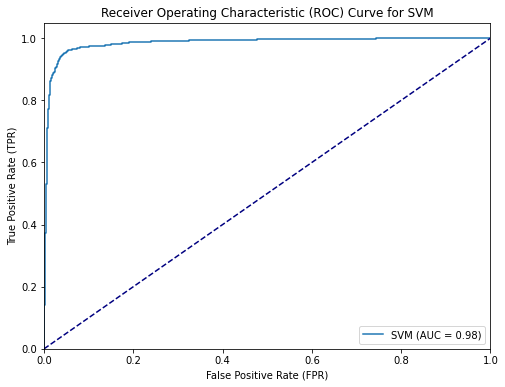

In [7]:
# Predict probabilities for each class
y_pred_probs = svm_model.predict_proba(X_test)

# Binarize the labels for multiclass ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])

# Calculate micro-average ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_probs.ravel())
roc_auc = auc(fpr, tpr)

# Print AUC score
print(f"SVM AUC Score: {roc_auc}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"SVM (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVM')
plt.legend(loc="lower right")
plt.show()

In [8]:
# Calculate micro-average F1 score
y_pred = svm_model.predict(X_test)
f1_micro = f1_score(y_test, y_pred, average='micro')

# Print F1 score
print(f"SVM F1 Score (Micro): {f1_micro}")

SVM F1 Score (Micro): 0.9077040427154842


In [9]:
from sklearn.metrics import precision_score, recall_score

# Calculate precision and recall
precision_micro = precision_score(y_test, y_pred, average='micro')
recall_micro = recall_score(y_test, y_pred, average='micro')

# Print precision and recall
print(f"SVM Precision (Micro): {precision_micro}")
print(f"SVM Recall (Micro): {recall_micro}")

SVM Precision (Micro): 0.9077040427154843
SVM Recall (Micro): 0.9077040427154843


In [10]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[295   0   4   1]
 [  1 402   2   0]
 [ 12  11 250  33]
 [  5   4  48 243]]


In [11]:
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1', 'Class 2', 'Class 3'])

# Print classification report
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.94      0.98      0.96       300
     Class 1       0.96      0.99      0.98       405
     Class 2       0.82      0.82      0.82       306
     Class 3       0.88      0.81      0.84       300

    accuracy                           0.91      1311
   macro avg       0.90      0.90      0.90      1311
weighted avg       0.91      0.91      0.91      1311



In [12]:
from sklearn.metrics import matthews_corrcoef

# Calculate Matthews correlation coefficient
mcc = matthews_corrcoef(y_test, y_pred)

# Print MCC
print(f"SVM MCC: {mcc}")

SVM MCC: 0.8763417196017619


In [13]:
from sklearn.metrics import balanced_accuracy_score

# Calculate balanced accuracy
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

# Print balanced accuracy
print(f"SVM Balanced Accuracy: {balanced_accuracy}")

SVM Balanced Accuracy: 0.9007298474945534


# SVM with polynomial Kernel

In [15]:
# SVM with polynomial kernel
svm_poly = SVC(kernel='poly', degree=3, C=1.0, gamma='scale',probability=True)
svm_poly.fit(X_train, y_train)

SVC(kernel='poly', probability=True)

In [16]:
# Predict and evaluate
y_pred = svm_poly.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM with Polynomial Kernel Accuracy: {accuracy}")

SVM with Polynomial Kernel Accuracy: 0.9206712433257056


SVM poly AUC Score: 0.7924284977026521


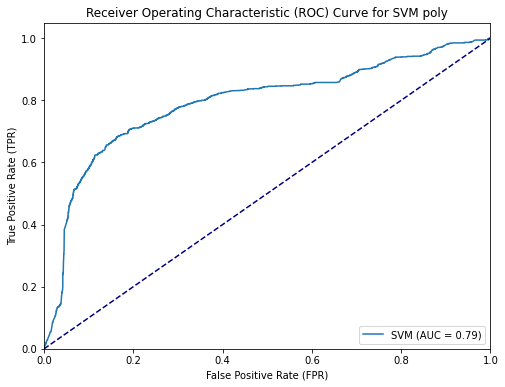

In [40]:
# Predict probabilities for each class
y_pred_probs = svm_poly.predict_proba(X_test)

# Binarize the labels for multiclass ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])

# Calculate micro-average ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_probs.ravel())
roc_auc = auc(fpr, tpr)

# Print AUC score
print(f"SVM poly AUC Score: {roc_auc}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"SVM (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVM poly')
plt.legend(loc="lower right")
plt.show()

In [18]:
# Calculate micro-average F1 score
y_pred = svm_poly.predict(X_test)
f1_micro = f1_score(y_test, y_pred, average='micro')

# Print F1 score
print(f"SVM with polynomial kernel F1 Score (Micro): {f1_micro}")

SVM with polynomial kernel F1 Score (Micro): 0.9206712433257056


In [19]:
from sklearn.metrics import precision_score, recall_score

# Calculate precision and recall
precision_micro = precision_score(y_test, y_pred, average='micro')
recall_micro = recall_score(y_test, y_pred, average='micro')

# Print precision and recall
print(f"SVM Poly Precision (Micro): {precision_micro}")
print(f"SVM Poly Recall (Micro): {recall_micro}")

SVM Poly Precision (Micro): 0.9206712433257056
SVM Poly Recall (Micro): 0.9206712433257056


In [20]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[291   0   3   6]
 [  1 395   1   8]
 [ 14   7 254  31]
 [  5   2  26 267]]


In [21]:
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1', 'Class 2', 'Class 3'])

# Print classification report
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.94      0.97      0.95       300
     Class 1       0.98      0.98      0.98       405
     Class 2       0.89      0.83      0.86       306
     Class 3       0.86      0.89      0.87       300

    accuracy                           0.92      1311
   macro avg       0.92      0.92      0.92      1311
weighted avg       0.92      0.92      0.92      1311



In [22]:
from sklearn.metrics import matthews_corrcoef

# Calculate Matthews correlation coefficient
mcc = matthews_corrcoef(y_test, y_pred)

# Print MCC
print(f"SVM Poly MCC: {mcc}")

SVM Poly MCC: 0.893850684619848


In [23]:
from sklearn.metrics import balanced_accuracy_score

# Calculate balanced accuracy
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

# Print balanced accuracy
print(f"SVM Poly Balanced Accuracy: {balanced_accuracy}")

SVM Poly Balanced Accuracy: 0.9163435003631083


# SVM RBF Kernel

In [29]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
# SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale',probability=True)
svm_rbf.fit(X_train, y_train)

SVC(probability=True)

In [35]:
# Predictions
y_pred_rbf = svm_rbf.predict(X_test)

In [36]:
# Accuracy
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"SVM with RBF Kernel - Accuracy: {accuracy_rbf}")

SVM with RBF Kernel - Accuracy: 0.9046529366895499


SVM rbf AUC Score: 0.9904525904243137


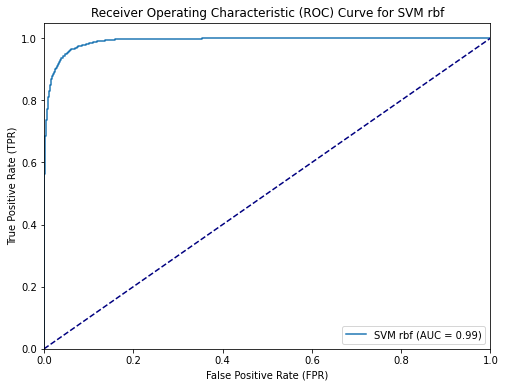

In [39]:
# Predict probabilities for each class
y_pred_probs = svm_rbf.predict_proba(X_test)

# Binarize the labels for multiclass ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])

# Calculate micro-average ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_probs.ravel())
roc_auc = auc(fpr, tpr)

# Print AUC score
print(f"SVM rbf AUC Score: {roc_auc}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"SVM rbf (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVM rbf')
plt.legend(loc="lower right")
plt.show()

In [42]:
# Calculate micro-average F1 score
y_pred = svm_rbf.predict(X_test)
f1_micro = f1_score(y_test, y_pred, average='micro')

# Print F1 score
print(f"SVM rbf F1 Score (Micro): {f1_micro}")

SVM rbf F1 Score (Micro): 0.9046529366895499


In [43]:
from sklearn.metrics import precision_score, recall_score

# Calculate precision and recall
precision_micro = precision_score(y_test, y_pred, average='micro')
recall_micro = recall_score(y_test, y_pred, average='micro')

# Print precision and recall
print(f"SVM rbf Precision (Micro): {precision_micro}")
print(f"SVM rbf Recall (Micro): {recall_micro}")

SVM rbf Precision (Micro): 0.9046529366895499
SVM rbf Recall (Micro): 0.9046529366895499


In [44]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[294   0   4   2]
 [  0 397   2   6]
 [ 16  21 241  28]
 [  5   0  41 254]]


In [45]:
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1', 'Class 2', 'Class 3'])

# Print classification report
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.93      0.98      0.96       300
     Class 1       0.95      0.98      0.96       405
     Class 2       0.84      0.79      0.81       306
     Class 3       0.88      0.85      0.86       300

    accuracy                           0.90      1311
   macro avg       0.90      0.90      0.90      1311
weighted avg       0.90      0.90      0.90      1311



In [46]:
from sklearn.metrics import matthews_corrcoef

# Calculate Matthews correlation coefficient
mcc = matthews_corrcoef(y_test, y_pred)

# Print MCC
print(f"SVM rbf MCC: {mcc}")

SVM rbf MCC: 0.8722324367037068


In [47]:
from sklearn.metrics import balanced_accuracy_score

# Calculate balanced accuracy
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

# Print balanced accuracy
print(f"SVM rbf Balanced Accuracy: {balanced_accuracy}")

SVM rbf Balanced Accuracy: 0.8986238198983297


# Random Forest 100 Estimators

In [14]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
# Predict and evaluate
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy}")

Random Forest Accuracy: 0.9405034324942791


Random Forest AUC Score: 0.9956083622647306


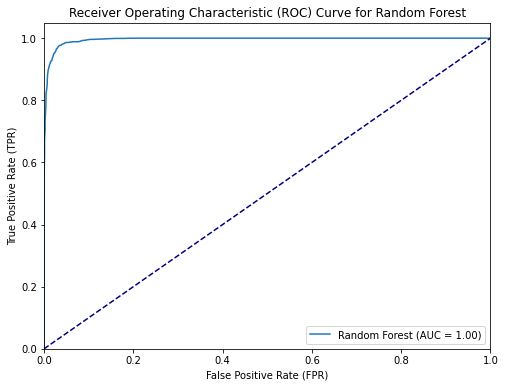

In [16]:
# Predict probabilities for each class
y_pred_probs = rf_model.predict_proba(X_test)

# Binarize the labels for multiclass ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])

# Calculate micro-average ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_probs.ravel())
roc_auc = auc(fpr, tpr)

# Print AUC score
print(f"Random Forest AUC Score: {roc_auc}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()

In [17]:
# Calculate micro-average F1 score
y_pred = rf_model.predict(X_test)
f1_micro = f1_score(y_test, y_pred, average='micro')

# Print F1 score
print(f"Random Forest F1 Score (Micro): {f1_micro}")

Random Forest F1 Score (Micro): 0.9405034324942791


In [18]:
from sklearn.metrics import precision_score, recall_score

# Calculate precision and recall
precision_micro = precision_score(y_test, y_pred, average='micro')
recall_micro = recall_score(y_test, y_pred, average='micro')

# Print precision and recall
print(f"Random Forest Precision (Micro): {precision_micro}")
print(f"Random Forest Recall (Micro): {recall_micro}")

Random Forest Precision (Micro): 0.9405034324942791
Random Forest Recall (Micro): 0.9405034324942791


In [19]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[290   1   7   2]
 [  0 405   0   0]
 [  4   8 285   9]
 [  6   0  41 253]]


In [20]:
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1', 'Class 2', 'Class 3'])

# Print classification report
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.97      0.97      0.97       300
     Class 1       0.98      1.00      0.99       405
     Class 2       0.86      0.93      0.89       306
     Class 3       0.96      0.84      0.90       300

    accuracy                           0.94      1311
   macro avg       0.94      0.94      0.94      1311
weighted avg       0.94      0.94      0.94      1311



In [21]:
from sklearn.metrics import matthews_corrcoef

# Calculate Matthews correlation coefficient
mcc = matthews_corrcoef(y_test, y_pred)

# Print MCC
print(f"Random Forest MCC: {mcc}")

Random Forest MCC: 0.9208669010279439


In [22]:
from sklearn.metrics import balanced_accuracy_score

# Calculate balanced accuracy
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

# Print balanced accuracy
print(f"Random Forest Balanced Accuracy: {balanced_accuracy}")

Random Forest Balanced Accuracy: 0.935343137254902


# Random Forest with estimators = 200 and max depth = 10

In [58]:
# Random Forest with changed parameters
rf_model1 = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)

In [61]:
# Fit the model to the training data
rf_model1.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [62]:
# Predictions
y_pred_rf = rf_model1.predict(X_test)

In [63]:
# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest - Accuracy: {accuracy_rf}")

Random Forest - Accuracy: 0.9115179252479023


RF with 200 estimators AUC Score: 0.9905402525094725


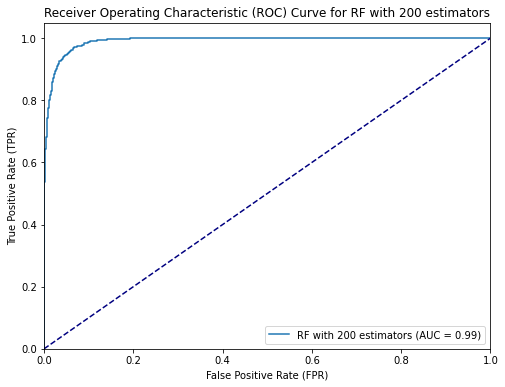

In [64]:
# Predict probabilities for each class
y_pred_probs = rf_model1.predict_proba(X_test)

# Binarize the labels for multiclass ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])

# Calculate micro-average ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_probs.ravel())
roc_auc = auc(fpr, tpr)

# Print AUC score
print(f"RF with 200 estimators AUC Score: {roc_auc}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"RF with 200 estimators (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for RF with 200 estimators')
plt.legend(loc="lower right")
plt.show()

In [66]:
# Calculate micro-average F1 score
y_pred = rf_model1.predict(X_test)
f1_micro = f1_score(y_test, y_pred, average='micro')

# Print F1 score
print(f"RF with 200 estimators F1 Score (Micro): {f1_micro}")

RF with 200 estimators F1 Score (Micro): 0.9115179252479023


In [67]:
from sklearn.metrics import precision_score, recall_score

# Calculate precision and recall
precision_micro = precision_score(y_test, y_pred, average='micro')
recall_micro = recall_score(y_test, y_pred, average='micro')

# Print precision and recall
print(f"RF with 200 estimators Precision (Micro): {precision_micro}")
print(f"RF with 200 estimators Recall (Micro): {recall_micro}")

RF with 200 estimators Precision (Micro): 0.9115179252479023
RF with 200 estimators Recall (Micro): 0.9115179252479023


In [68]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[292   2   5   1]
 [  0 405   0   0]
 [ 11  27 260   8]
 [  9   0  53 238]]


In [69]:
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1', 'Class 2', 'Class 3'])

# Print classification report
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.94      0.97      0.95       300
     Class 1       0.93      1.00      0.97       405
     Class 2       0.82      0.85      0.83       306
     Class 3       0.96      0.79      0.87       300

    accuracy                           0.91      1311
   macro avg       0.91      0.90      0.91      1311
weighted avg       0.91      0.91      0.91      1311



In [70]:
from sklearn.metrics import matthews_corrcoef

# Calculate Matthews correlation coefficient
mcc = matthews_corrcoef(y_test, y_pred)

# Print MCC
print(f"RF with 200 estimators MCC: {mcc}")

RF with 200 estimators MCC: 0.8823658977303089


In [71]:
from sklearn.metrics import balanced_accuracy_score

# Calculate balanced accuracy
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

# Print balanced accuracy
print(f"RF with 200 estimators Balanced Accuracy: {balanced_accuracy}")

RF with 200 estimators Balanced Accuracy: 0.9040849673202614


# KNN with neighbors = 3

In [23]:
# Train KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [24]:
# Predict and evaluate
y_pred = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"K-Nearest Neighbors Accuracy: {accuracy}")

K-Nearest Neighbors Accuracy: 0.893211289092296


KNN AUC Score: 0.985804269570221


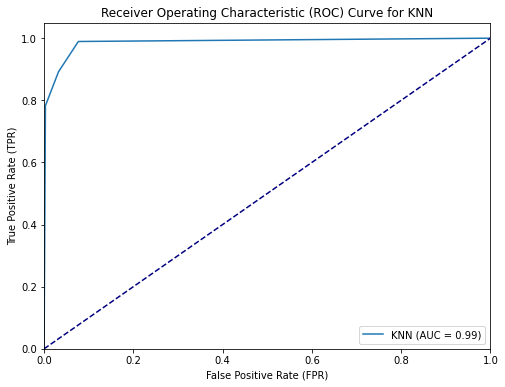

In [25]:
# Predict probabilities for each class
y_pred_probs = knn_model.predict_proba(X_test)

# Binarize the labels for multiclass ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])

# Calculate micro-average ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_probs.ravel())
roc_auc = auc(fpr, tpr)

# Print AUC score
print(f"KNN AUC Score: {roc_auc}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"KNN (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for KNN')
plt.legend(loc="lower right")
plt.show()

In [26]:
# Calculate micro-average F1 score
y_pred = knn_model.predict(X_test)
f1_micro = f1_score(y_test, y_pred, average='micro')

# Print F1 score
print(f"KNN F1 Score (Micro): {f1_micro}")

KNN F1 Score (Micro): 0.893211289092296


In [27]:
from sklearn.metrics import precision_score, recall_score

# Calculate precision and recall
precision_micro = precision_score(y_test, y_pred, average='micro')
recall_micro = recall_score(y_test, y_pred, average='micro')

# Print precision and recall
print(f"KNN Precision (Micro): {precision_micro}")
print(f"KNN Recall (Micro): {recall_micro}")

KNN Precision (Micro): 0.893211289092296
KNN Recall (Micro): 0.893211289092296


In [28]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[299   0   1   0]
 [  6 388   2   9]
 [ 28  40 206  32]
 [  3   1  18 278]]


In [29]:
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1', 'Class 2', 'Class 3'])

# Print classification report
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.89      1.00      0.94       300
     Class 1       0.90      0.96      0.93       405
     Class 2       0.91      0.67      0.77       306
     Class 3       0.87      0.93      0.90       300

    accuracy                           0.89      1311
   macro avg       0.89      0.89      0.89      1311
weighted avg       0.89      0.89      0.89      1311



In [30]:
from sklearn.metrics import matthews_corrcoef

# Calculate Matthews correlation coefficient
mcc = matthews_corrcoef(y_test, y_pred)

# Print MCC
print(f"KNN MCC: {mcc}")

KNN MCC: 0.8593560332069228


In [31]:
from sklearn.metrics import balanced_accuracy_score

# Calculate balanced accuracy
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

# Print balanced accuracy
print(f"KNN Balanced Accuracy: {balanced_accuracy}")

KNN Balanced Accuracy: 0.8886401597676108


# KNN with N = 1

In [72]:
# Train KNN model
knn_model1 = KNeighborsClassifier(n_neighbors=1)
knn_model1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [103]:
# Predict and evaluate
y_pred = knn_model1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"K-Nearest Neighbors n=1 Accuracy: {accuracy}")

K-Nearest Neighbors n=1 Accuracy: 0.9794050343249427


KNN n=1 AUC Score: 0.9862700228832952


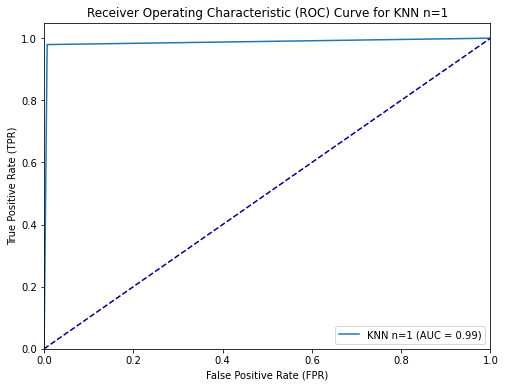

In [75]:
# Predict probabilities for each class
y_pred_probs = knn_model1.predict_proba(X_test)

# Binarize the labels for multiclass ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])

# Calculate micro-average ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_probs.ravel())
roc_auc = auc(fpr, tpr)

# Print AUC score
print(f"KNN n=1 AUC Score: {roc_auc}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"KNN n=1 (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for KNN n=1')
plt.legend(loc="lower right")
plt.show()

In [87]:
# Calculate micro-average F1 score
y_pred = knn_model1.predict(X_test)
f1_micro = f1_score(y_test, y_pred, average='micro')

# Print F1 score
print(f"KNN n=1 F1 Score (Micro): {f1_micro}")

KNN n=1 F1 Score (Micro): 0.9794050343249427


In [88]:
from sklearn.metrics import precision_score, recall_score

# Calculate precision and recall
precision_micro = precision_score(y_test, y_pred, average='micro')
recall_micro = recall_score(y_test, y_pred, average='micro')

# Print precision and recall
print(f"KNN with n=1 Precision (Micro): {precision_micro}")
print(f"KNN with n=1 Recall (Micro): {recall_micro}")

KNN with n=1 Precision (Micro): 0.9794050343249427
KNN with n=1 Recall (Micro): 0.9794050343249427


In [89]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[300   0   0   0]
 [  0 402   1   2]
 [  2   2 292  10]
 [  1   0   9 290]]


In [90]:
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1', 'Class 2', 'Class 3'])

# Print classification report
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      1.00      1.00       300
     Class 1       1.00      0.99      0.99       405
     Class 2       0.97      0.95      0.96       306
     Class 3       0.96      0.97      0.96       300

    accuracy                           0.98      1311
   macro avg       0.98      0.98      0.98      1311
weighted avg       0.98      0.98      0.98      1311



In [91]:
from sklearn.metrics import matthews_corrcoef

# Calculate Matthews correlation coefficient
mcc = matthews_corrcoef(y_test, y_pred)

# Print MCC
print(f"KNN with n=1 MCC: {mcc}")

KNN with n=1 MCC: 0.9723831461861077


In [92]:
from sklearn.metrics import balanced_accuracy_score

# Calculate balanced accuracy
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

# Print balanced accuracy
print(f"KNN with n=1 Balanced Accuracy: {balanced_accuracy}")

KNN with n=1 Balanced Accuracy: 0.9783769063180828


# KNN with n=2

In [93]:
# Train KNN model
knn_model2 = KNeighborsClassifier(n_neighbors=2)
knn_model2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [102]:
# Predict and evaluate
y_pred = knn_model2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"K-Nearest Neighbors n=2 Accuracy: {accuracy}")

K-Nearest Neighbors n=2 Accuracy: 0.9244851258581236


KNN n=2 AUC Score: 0.9880157008224915


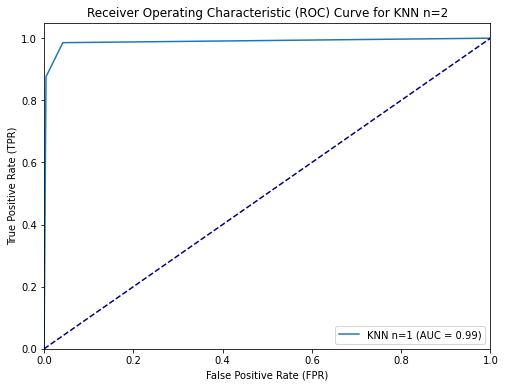

In [95]:
# Predict probabilities for each class
y_pred_probs = knn_model2.predict_proba(X_test)

# Binarize the labels for multiclass ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])

# Calculate micro-average ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_probs.ravel())
roc_auc = auc(fpr, tpr)

# Print AUC score
print(f"KNN n=2 AUC Score: {roc_auc}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"KNN n=1 (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for KNN n=2')
plt.legend(loc="lower right")
plt.show()

In [96]:
# Calculate micro-average F1 score
y_pred = knn_model2.predict(X_test)
f1_micro = f1_score(y_test, y_pred, average='micro')

# Print F1 score
print(f"KNN n=2 F1 Score (Micro): {f1_micro}")

KNN n=2 F1 Score (Micro): 0.9244851258581236


In [97]:
from sklearn.metrics import precision_score, recall_score

# Calculate precision and recall
precision_micro = precision_score(y_test, y_pred, average='micro')
recall_micro = recall_score(y_test, y_pred, average='micro')

# Print precision and recall
print(f"KNN with n=2 Precision (Micro): {precision_micro}")
print(f"KNN with n=2 Recall (Micro): {recall_micro}")

KNN with n=2 Precision (Micro): 0.9244851258581236
KNN with n=2 Recall (Micro): 0.9244851258581236


In [98]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[300   0   0   0]
 [  3 400   1   1]
 [ 21  34 245   6]
 [  3   0  30 267]]


In [99]:
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1', 'Class 2', 'Class 3'])

# Print classification report
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.92      1.00      0.96       300
     Class 1       0.92      0.99      0.95       405
     Class 2       0.89      0.80      0.84       306
     Class 3       0.97      0.89      0.93       300

    accuracy                           0.92      1311
   macro avg       0.93      0.92      0.92      1311
weighted avg       0.92      0.92      0.92      1311



In [100]:
from sklearn.metrics import matthews_corrcoef

# Calculate Matthews correlation coefficient
mcc = matthews_corrcoef(y_test, y_pred)

# Print MCC
print(f"KNN with n=2 MCC: {mcc}")

KNN with n=2 MCC: 0.8995716346410748


In [101]:
from sklearn.metrics import balanced_accuracy_score

# Calculate balanced accuracy
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

# Print balanced accuracy
print(f"KNN with n=2 Balanced Accuracy: {balanced_accuracy}")

KNN with n=2 Balanced Accuracy: 0.919576978939724


# Logistic Regression max iteration = 1000

In [32]:
# Train Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [33]:
# Predict and evaluate
y_pred = lr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy}")

Logistic Regression Accuracy: 0.8993135011441648


Logistic Regression AUC Score: 0.9794366469795466


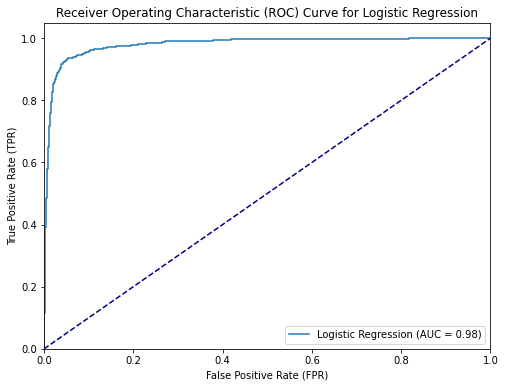

In [34]:
# Predict probabilities for each class
y_pred_probs = lr_model.predict_proba(X_test)

# Binarize the labels for multiclass ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])

# Calculate micro-average ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_probs.ravel())
roc_auc = auc(fpr, tpr)

# Print AUC score
print(f"Logistic Regression AUC Score: {roc_auc}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

In [35]:
# Calculate micro-average F1 score
y_pred = lr_model.predict(X_test)
f1_micro = f1_score(y_test, y_pred, average='micro')

# Print F1 score
print(f"Logistic F1 Score (Micro): {f1_micro}")

Logistic F1 Score (Micro): 0.8993135011441648


In [36]:
from sklearn.metrics import precision_score, recall_score

# Calculate precision and recall
precision_micro = precision_score(y_test, y_pred, average='micro')
recall_micro = recall_score(y_test, y_pred, average='micro')

# Print precision and recall
print(f"Logistic Regression Precision (Micro): {precision_micro}")
print(f"Logistic Recall (Micro): {recall_micro}")

Logistic Regression Precision (Micro): 0.8993135011441648
Logistic Recall (Micro): 0.8993135011441648


In [37]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[288   2   9   1]
 [  1 398   3   3]
 [ 10  12 251  33]
 [ 10   2  46 242]]


In [38]:
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1', 'Class 2', 'Class 3'])

# Print classification report
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.93      0.96      0.95       300
     Class 1       0.96      0.98      0.97       405
     Class 2       0.81      0.82      0.82       306
     Class 3       0.87      0.81      0.84       300

    accuracy                           0.90      1311
   macro avg       0.89      0.89      0.89      1311
weighted avg       0.90      0.90      0.90      1311



In [39]:
from sklearn.metrics import matthews_corrcoef

# Calculate Matthews correlation coefficient
mcc = matthews_corrcoef(y_test, y_pred)

# Print MCC
print(f"Logistic Regression MCC: {mcc}")

Logistic Regression MCC: 0.8650205730684324


In [40]:
from sklearn.metrics import balanced_accuracy_score

# Calculate balanced accuracy
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

# Print balanced accuracy
print(f"Logistic Regression Balanced Accuracy: {balanced_accuracy}")

Logistic Regression Balanced Accuracy: 0.8924110384894699


# Logistic Regression with liblinear solver

In [112]:
# Logistic Regression with changed parameters
logreg_model = LogisticRegression(C=0.5, max_iter=2000, solver='liblinear', random_state=42)
logreg_model.fit(X_train, y_train)

LogisticRegression(C=0.5, max_iter=2000, random_state=42, solver='liblinear')

In [113]:
# Predictions
y_pred_logreg = logreg_model.predict(X_test)

In [114]:
# Accuracy
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression with liblinear solver - Accuracy: {accuracy_logreg}")

Logistic Regression with liblinear solver - Accuracy: 0.9031273836765827


Logistic Regression with Liblinear solver AUC Score: 0.9787004406183435


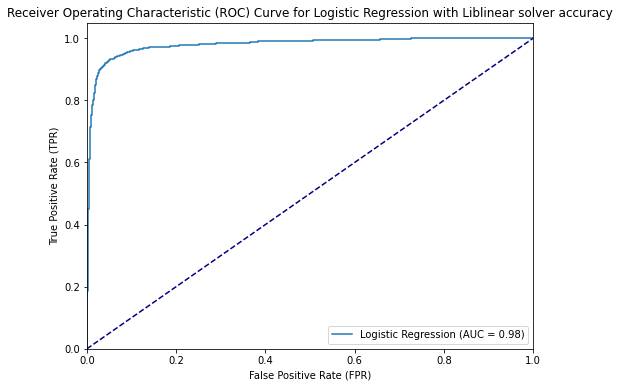

In [115]:
# Predict probabilities for each class
y_pred_probs = logreg_model.predict_proba(X_test)

# Binarize the labels for multiclass ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])

# Calculate micro-average ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_probs.ravel())
roc_auc = auc(fpr, tpr)

# Print AUC score
print(f"Logistic Regression with Liblinear solver AUC Score: {roc_auc}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression with Liblinear solver accuracy')
plt.legend(loc="lower right")
plt.show()

In [116]:
# Calculate micro-average F1 score
y_pred = logreg_model.predict(X_test)
f1_micro = f1_score(y_test, y_pred, average='micro')

# Print F1 score
print(f"Logistic Regression with Liblinear solver F1 Score (Micro): {f1_micro}")

Logistic Regression with Liblinear solver F1 Score (Micro): 0.9031273836765827


In [117]:
from sklearn.metrics import precision_score, recall_score

# Calculate precision and recall
precision_micro = precision_score(y_test, y_pred, average='micro')
recall_micro = recall_score(y_test, y_pred, average='micro')

# Print precision and recall
print(f"Logistic Regression with liblinear solver Precision (Micro): {precision_micro}")
print(f"Logistic Regression with liblinear solver Recall (Micro): {recall_micro}")

Logistic Regression with liblinear solver Precision (Micro): 0.9031273836765827
Logistic Regression with liblinear solver Recall (Micro): 0.9031273836765827


In [118]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[288   0   9   3]
 [  0 402   2   1]
 [ 16  11 242  37]
 [  4   3  41 252]]


In [119]:
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1', 'Class 2', 'Class 3'])

# Print classification report
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.94      0.96      0.95       300
     Class 1       0.97      0.99      0.98       405
     Class 2       0.82      0.79      0.81       306
     Class 3       0.86      0.84      0.85       300

    accuracy                           0.90      1311
   macro avg       0.90      0.90      0.90      1311
weighted avg       0.90      0.90      0.90      1311



In [120]:
from sklearn.metrics import matthews_corrcoef

# Calculate Matthews correlation coefficient
mcc = matthews_corrcoef(y_test, y_pred)

# Print MCC
print(f"Logistic Regression with Liblinear solver MCC: {mcc}")

Logistic Regression with Liblinear solver MCC: 0.8700507818365796


In [121]:
from sklearn.metrics import balanced_accuracy_score

# Calculate balanced accuracy
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

# Print balanced accuracy
print(f"Logistic Regression with Liblinear solve Balanced Accuracy: {balanced_accuracy}")

Logistic Regression with Liblinear solve Balanced Accuracy: 0.8958605664488016


# XGBoost Classifier

In [41]:
# Train XGBoost model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [42]:
# Predict and evaluate
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {accuracy}")

XGBoost Accuracy: 0.9549961861174676


XGB AUC Score: 0.9961715717676108


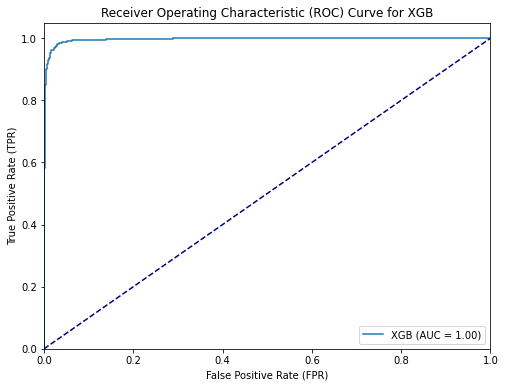

In [43]:
 # Predict probabilities for each class
y_pred_probs = xgb_model.predict_proba(X_test)

# Binarize the labels for multiclass ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])

# Calculate micro-average ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_probs.ravel())
roc_auc = auc(fpr, tpr)

# Print AUC score
print(f"XGB AUC Score: {roc_auc}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"XGB (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for XGB')
plt.legend(loc="lower right")
plt.show()

In [44]:
# Calculate micro-average F1 score
y_pred = xgb_model.predict(X_test)
f1_micro = f1_score(y_test, y_pred, average='micro')

# Print F1 score
print(f"XGB F1 Score (Micro): {f1_micro}")

XGB F1 Score (Micro): 0.9549961861174676


In [45]:
from sklearn.metrics import precision_score, recall_score

# Calculate precision and recall
precision_micro = precision_score(y_test, y_pred, average='micro')
recall_micro = recall_score(y_test, y_pred, average='micro')

# Print precision and recall
print(f"XGB Precision (Micro): {precision_micro}")
print(f"XGB Recall (Micro): {recall_micro}")

XGB Precision (Micro): 0.9549961861174676
XGB Recall (Micro): 0.9549961861174676


In [46]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[294   0   4   2]
 [  0 405   0   0]
 [  8   8 285   5]
 [  3   0  29 268]]


In [47]:
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1', 'Class 2', 'Class 3'])

# Print classification report
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.96      0.98      0.97       300
     Class 1       0.98      1.00      0.99       405
     Class 2       0.90      0.93      0.91       306
     Class 3       0.97      0.89      0.93       300

    accuracy                           0.95      1311
   macro avg       0.95      0.95      0.95      1311
weighted avg       0.96      0.95      0.95      1311



In [48]:
from sklearn.metrics import matthews_corrcoef

# Calculate Matthews correlation coefficient
mcc = matthews_corrcoef(y_test, y_pred)

# Print MCC
print(f"XGB MCC: {mcc}")

XGB MCC: 0.9398935706797332


In [49]:
from sklearn.metrics import balanced_accuracy_score

# Calculate balanced accuracy
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

# Print balanced accuracy
print(f"XGB Balanced Accuracy: {balanced_accuracy}")

XGB Balanced Accuracy: 0.9511764705882353


# XGBClassifier with different parameters

In [159]:
# XGBoost with different parameters
xgb_model1 = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)

In [160]:
# Fit the model to the training data
xgb_model1.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [161]:
# Predictions
y_pred_xgb = xgb_model1.predict(X_test)

In [162]:
# Accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost model with different parameters - Accuracy: {accuracy_xgb}")

XGBoost model with different parameters - Accuracy: 0.9099923722349351


XGB with different parameters AUC Score: 0.9901960042768236


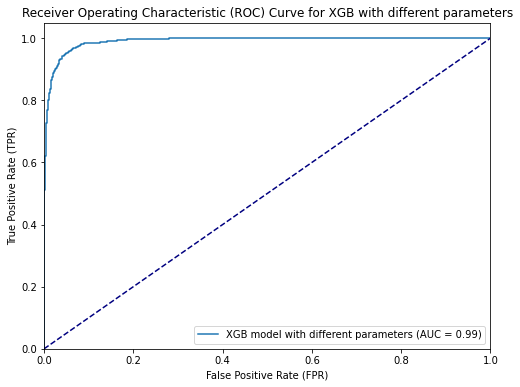

In [158]:
 # Predict probabilities for each class
y_pred_probs = xgb_model1.predict_proba(X_test)

# Binarize the labels for multiclass ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])

# Calculate micro-average ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_probs.ravel())
roc_auc = auc(fpr, tpr)

# Print AUC score
print(f"XGB with different parameters AUC Score: {roc_auc}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"XGB model with different parameters (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for XGB with different parameters')
plt.legend(loc="lower right")
plt.show()

In [152]:
# Calculate micro-average F1 score
y_pred = xgb_model1.predict(X_test)
f1_micro = f1_score(y_test, y_pred, average='micro')

# Print F1 score
print(f"XGB model with different parameters F1 Score (Micro): {f1_micro}")

XGB model with different parameters F1 Score (Micro): 0.909992372234935


In [153]:
from sklearn.metrics import precision_score, recall_score

# Calculate precision and recall
precision_micro = precision_score(y_test, y_pred, average='micro')
recall_micro = recall_score(y_test, y_pred, average='micro')

# Print precision and recall
print(f"xgb model with different parameters Precision (Micro): {precision_micro}")
print(f"xgb model with different parameters Recall (Micro): {recall_micro}")

xgb model with different parameters Precision (Micro): 0.9099923722349351
xgb model with different parameters Recall (Micro): 0.9099923722349351


In [163]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[292   1   4   3]
 [  0 402   1   2]
 [ 14  29 251  12]
 [  5   0  47 248]]


In [164]:
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1', 'Class 2', 'Class 3'])

# Print classification report
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.94      0.97      0.96       300
     Class 1       0.93      0.99      0.96       405
     Class 2       0.83      0.82      0.82       306
     Class 3       0.94      0.83      0.88       300

    accuracy                           0.91      1311
   macro avg       0.91      0.90      0.90      1311
weighted avg       0.91      0.91      0.91      1311



In [165]:
from sklearn.metrics import matthews_corrcoef

# Calculate Matthews correlation coefficient
mcc = matthews_corrcoef(y_test, y_pred)

# Print MCC
print(f"XGB with different parameters MCC: {mcc}")

XGB with different parameters MCC: 0.8796971882647827


In [166]:
from sklearn.metrics import balanced_accuracy_score

# Calculate balanced accuracy
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

# Print balanced accuracy
print(f"XGB with different parameters: {balanced_accuracy}")

XGB with different parameters: 0.9032135076252724


# Decision Tree Classifier

In [50]:
# Train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [51]:
# Predict and evaluate
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy}")

Decision Tree Accuracy: 0.8848207475209764


Decision Tree AUC Score: 0.9232138316806509


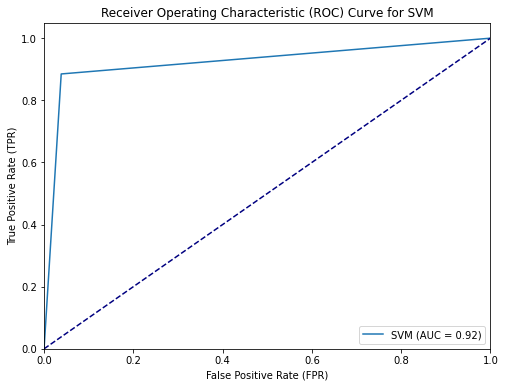

In [52]:
# Predict probabilities for each class
y_pred_probs = dt_model.predict_proba(X_test)

# Binarize the labels for multiclass ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])

# Calculate micro-average ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_probs.ravel())
roc_auc = auc(fpr, tpr)

# Print AUC score
print(f"Decision Tree AUC Score: {roc_auc}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"SVM (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVM')
plt.legend(loc="lower right")
plt.show()

In [53]:
# Calculate micro-average F1 score
y_pred = dt_model.predict(X_test)
f1_micro = f1_score(y_test, y_pred, average='micro')

# Print F1 score
print(f" F1 Score (Micro): {f1_micro}")

 F1 Score (Micro): 0.8848207475209764


In [54]:
from sklearn.metrics import precision_score, recall_score

# Calculate precision and recall
precision_micro = precision_score(y_test, y_pred, average='micro')
recall_micro = recall_score(y_test, y_pred, average='micro')

# Print precision and recall
print(f"Decision Tree Precision (Micro): {precision_micro}")
print(f"Decision Tree Recall (Micro): {recall_micro}")

Decision Tree Precision (Micro): 0.8848207475209764
Decision Tree Recall (Micro): 0.8848207475209764


In [55]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[272   5  16   7]
 [  3 394   7   1]
 [ 16  11 248  31]
 [ 13   3  38 246]]


In [56]:
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1', 'Class 2', 'Class 3'])

# Print classification report
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.89      0.91      0.90       300
     Class 1       0.95      0.97      0.96       405
     Class 2       0.80      0.81      0.81       306
     Class 3       0.86      0.82      0.84       300

    accuracy                           0.88      1311
   macro avg       0.88      0.88      0.88      1311
weighted avg       0.88      0.88      0.88      1311



In [57]:
from sklearn.metrics import matthews_corrcoef

# Calculate Matthews correlation coefficient
mcc = matthews_corrcoef(y_test, y_pred)

# Print MCC
print(f"Decision Tree MCC: {mcc}")

Decision Tree MCC: 0.8454713234554285


In [58]:
from sklearn.metrics import balanced_accuracy_score

# Calculate balanced accuracy
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

# Print balanced accuracy
print(f"Decision Tree Balanced Accuracy: {balanced_accuracy}")

Decision Tree Balanced Accuracy: 0.8774909222948438


# Gaussian Naive Bayes Model

In [59]:
# Train Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [60]:
# Predict and evaluate
y_pred = nb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Naive Bayes Accuracy: {accuracy}")

Naive Bayes Accuracy: 0.5781845919145691


Naive Bayes AUC Score: 0.7517914968941052


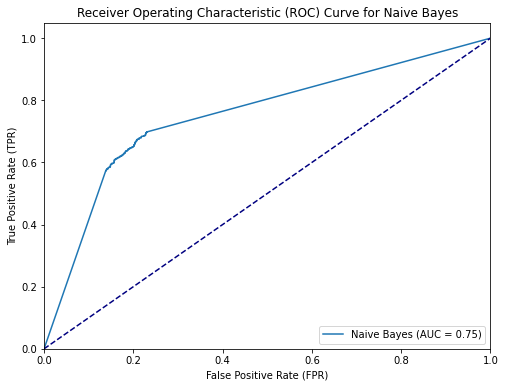

In [61]:
# Predict probabilities for each class
y_pred_probs = nb_model.predict_proba(X_test)

# Binarize the labels for multiclass ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])

# Calculate micro-average ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_probs.ravel())
roc_auc = auc(fpr, tpr)

# Print AUC score
print(f"Naive Bayes AUC Score: {roc_auc}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Naive Bayes (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for Naive Bayes')
plt.legend(loc="lower right")
plt.show()

In [62]:
# Calculate micro-average F1 score
y_pred = nb_model.predict(X_test)
f1_micro = f1_score(y_test, y_pred, average='micro')

# Print F1 score
print(f"Naive Bayes F1 Score (Micro): {f1_micro}")

Naive Bayes F1 Score (Micro): 0.5781845919145691


In [63]:
from sklearn.metrics import precision_score, recall_score

# Calculate precision and recall
precision_micro = precision_score(y_test, y_pred, average='micro')
recall_micro = recall_score(y_test, y_pred, average='micro')

# Print precision and recall
print(f"Naive Bayes Precision (Micro): {precision_micro}")
print(f"Naive Bayes Recall (Micro): {recall_micro}")

Naive Bayes Precision (Micro): 0.5781845919145691
Naive Bayes Recall (Micro): 0.5781845919145691


In [64]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[211   1  15  73]
 [ 21 229 106  49]
 [ 20  97  43 146]
 [ 18   0   7 275]]


In [65]:
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1', 'Class 2', 'Class 3'])

# Print classification report
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.78      0.70      0.74       300
     Class 1       0.70      0.57      0.63       405
     Class 2       0.25      0.14      0.18       306
     Class 3       0.51      0.92      0.65       300

    accuracy                           0.58      1311
   macro avg       0.56      0.58      0.55      1311
weighted avg       0.57      0.58      0.55      1311



In [66]:
from sklearn.metrics import matthews_corrcoef

# Calculate Matthews correlation coefficient
mcc = matthews_corrcoef(y_test, y_pred)

# Print MCC
print(f"Naive Bayes MCC: {mcc}")

Naive Bayes MCC: 0.45297073677200367


In [67]:
from sklearn.metrics import balanced_accuracy_score

# Calculate balanced accuracy
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

# Print balanced accuracy
print(f"Naive Bayes Balanced Accuracy: {balanced_accuracy}")

Naive Bayes Balanced Accuracy: 0.5814887436456063


# Neural Network Model

In [169]:
# Build and train Neural Network model
modelNN = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')
])

modelNN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
modelNN.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred_probs = modelNN.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
accuracy = accuracy_score(y_test, y_pred)
print(f"Neural Network Accuracy: {accuracy}")

Epoch 1/10
143/143 [==============================] - 2s 12ms/step - loss: 0.5794 - accuracy: 0.8337 - val_loss: 2.6872 - val_accuracy: 0.3465
Epoch 2/10
143/143 [==============================] - 2s 11ms/step - loss: 0.2068 - accuracy: 0.9322 - val_loss: 2.6929 - val_accuracy: 0.4961
Epoch 3/10
143/143 [==============================] - 2s 11ms/step - loss: 0.1210 - accuracy: 0.9606 - val_loss: 2.8423 - val_accuracy: 0.5022
Epoch 4/10
143/143 [==============================] - 2s 11ms/step - loss: 0.0764 - accuracy: 0.9764 - val_loss: 2.7206 - val_accuracy: 0.4794
Epoch 5/10
143/143 [==============================] - 1s 10ms/step - loss: 0.0665 - accuracy: 0.9779 - val_loss: 3.9411 - val_accuracy: 0.3438
Epoch 6/10
143/143 [==============================] - 1s 10ms/step - loss: 0.0396 - accuracy: 0.9888 - val_loss: 4.0474 - val_accuracy: 0.4234
Epoch 7/10
143/143 [==============================] - 1s 10ms/step - loss: 0.0732 - accuracy: 0.9790 - val_loss: 3.5201 - val_accuracy: 0.4794

41/41 [==============================] - 0s 2ms/step


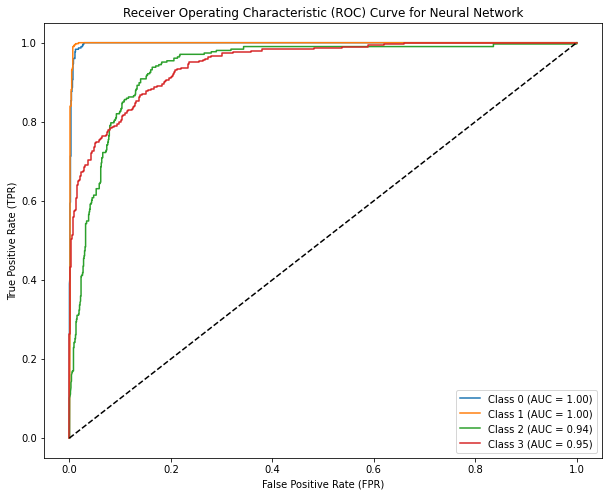

Neural Network AUC Score: 0.9703465223014922
Neural Network Micro F1 Score: 0.841342486651411


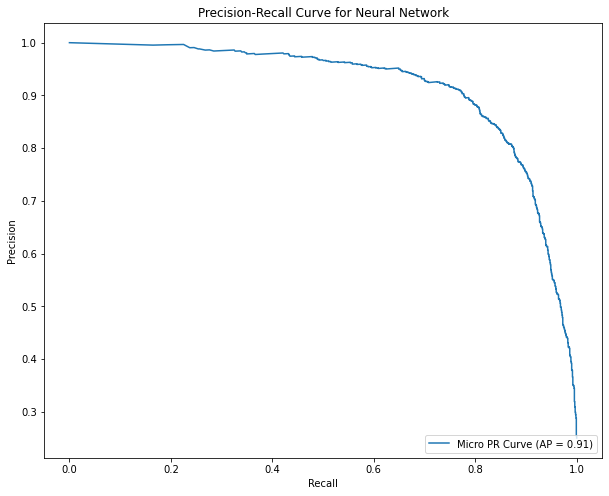

Confusion Matrix:
[[300   0   0   0]
 [  0 405   0   0]
 [ 12  14 278   2]
 [ 26   7 147 120]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       300
           1       0.95      1.00      0.97       405
           2       0.65      0.91      0.76       306
           3       0.98      0.40      0.57       300

    accuracy                           0.84      1311
   macro avg       0.87      0.83      0.81      1311
weighted avg       0.87      0.84      0.82      1311

Neural Network Matthews Correlation Coefficient (MCC): 0.8018030494182886
Neural Network Balanced Accuracy: 0.8271241830065359


In [172]:
# Predict probabilities for each class
y_pred_probs = modelNN.predict(X_test)

# Convert true labels to one-hot encoding
y_test_one_hot = label_binarize(y_test, classes=np.unique(y_test))

# ROC Curve and AUC Score
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(y_test_one_hot.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Micro F1 Score
f1_micro = f1_score(y_test, y_pred, average='micro')

# Precision-Recall Curve
precision_micro, recall_micro, _ = precision_recall_curve(y_test_one_hot.ravel(), y_pred_probs.ravel())

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification Report
class_report = classification_report(y_test, y_pred)

# Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred)

# Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, y_pred)

# Plot ROC Curve
plt.figure(figsize=(10, 8))
for i in range(y_test_one_hot.shape[1]):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for Neural Network')
plt.legend(loc="lower right")
plt.show()

# Print AUC Score
print(f"Neural Network AUC Score: {np.mean(list(roc_auc.values()))}")

# Print Micro F1 Score
print(f"Neural Network Micro F1 Score: {f1_micro}")

# Plot Precision-Recall Curve
plt.figure(figsize=(10, 8))
plt.plot(recall_micro, precision_micro, label=f'Micro PR Curve (AP = {auc(recall_micro, precision_micro):.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Neural Network')
plt.legend(loc="lower right")
plt.show()

# Print Confusion Matrix
print("Confusion Matrix:")
print(conf_matrix)

# Print Classification Report
print("Classification Report:")
print(class_report)

# Print Matthews Correlation Coefficient (MCC)
print(f"Neural Network Matthews Correlation Coefficient (MCC): {mcc}")

# Print Balanced Accuracy
print(f"Neural Network Balanced Accuracy: {balanced_acc}")

# One Hot Encoding

In [173]:
# Normalize images and one-hot encode labels
X_train = X_train.reshape(X_train.shape[0], 64, 64, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 64, 64, 1).astype('float32') / 255
y_train = to_categorical(y_train, 4)
y_test = to_categorical(y_test, 4)

# Convolutional Neural Network

In [174]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from skimage import io, color, transform
import numpy as np
import os
# Build CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

In [175]:
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

In [176]:
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

In [177]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [178]:
# Compile and train the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
143/143 [==============================] - 21s 140ms/step - loss: 0.5264 - accuracy: 0.8661 - val_loss: 4.6212 - val_accuracy: 0.0000e+00
Epoch 2/10
143/143 [==============================] - 20s 140ms/step - loss: 0.1392 - accuracy: 0.9582 - val_loss: 11.9643 - val_accuracy: 0.0000e+00
Epoch 3/10
143/143 [==============================] - 20s 137ms/step - loss: 0.0643 - accuracy: 0.9768 - val_loss: 4.0631 - val_accuracy: 0.0000e+00
Epoch 4/10
143/143 [==============================] - 20s 136ms/step - loss: 0.0277 - accuracy: 0.9910 - val_loss: 3.2909 - val_accuracy: 0.0884
Epoch 5/10
143/143 [==============================] - 17s 121ms/step - loss: 0.0143 - accuracy: 0.9967 - val_loss: 0.6034 - val_accuracy: 0.7970
Epoch 6/10
143/143 [==============================] - 18s 128ms/step - loss: 0.0200 - accuracy: 0.9947 - val_loss: 2.0086 - val_accuracy: 0.6378
Epoch 7/10
143/143 [==============================] - 19s 130ms/step - loss: 0.0077 - accuracy: 0.9980 - val_loss: 2.

In [179]:
# Evaluate the model
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
print(f"CNN Accuracy: {accuracy}")

41/41 [==============================] - 1s 27ms/step
CNN Accuracy: 0.8680396643783371


41/41 [==============================] - 1s 28ms/step


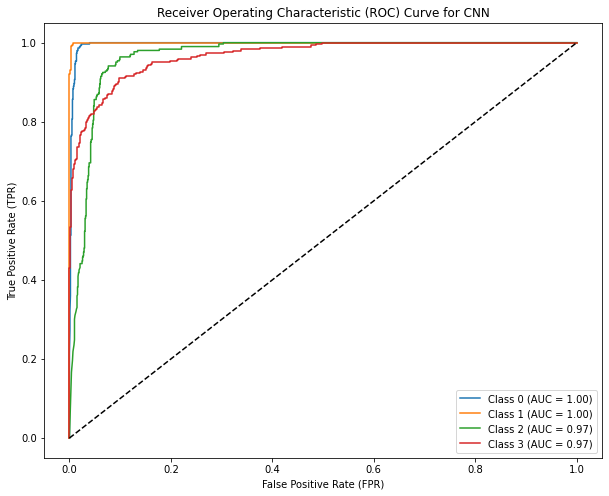

CNN AUC Score: 0.9825755125661255
CNN Micro F1 Score: 0.8680396643783371


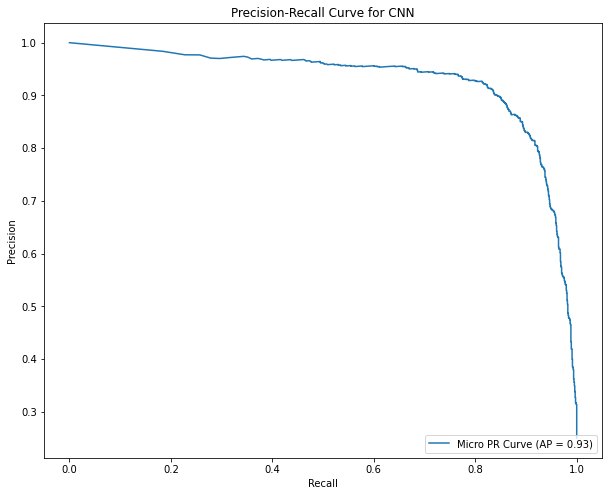

Confusion Matrix:
[[299   0   1   0]
 [  0 405   0   0]
 [  4   5 295   2]
 [ 37   4 120 139]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       300
           1       0.98      1.00      0.99       405
           2       0.71      0.96      0.82       306
           3       0.99      0.46      0.63       300

    accuracy                           0.87      1311
   macro avg       0.89      0.86      0.84      1311
weighted avg       0.89      0.87      0.85      1311

CNN Matthews Correlation Coefficient (MCC): 0.835606076712804
CNN Balanced Accuracy: 0.8560130718954249


In [180]:
# Predict probabilities for each class
y_pred_probs_cnn = model.predict(X_test)

# Convert one-hot encoded labels back to integers
y_test_int = np.argmax(y_test, axis=1)
y_pred_int_cnn = np.argmax(y_pred_probs_cnn, axis=1)

# Convert true labels to one-hot encoding
y_test_one_hot_cnn = to_categorical(y_test_int, num_classes=4)

# ROC Curve and AUC Score
fpr_cnn = dict()
tpr_cnn = dict()
roc_auc_cnn = dict()
for i in range(y_test_one_hot_cnn.shape[1]):
    fpr_cnn[i], tpr_cnn[i], _ = roc_curve(y_test_one_hot_cnn[:, i], y_pred_probs_cnn[:, i])
    roc_auc_cnn[i] = auc(fpr_cnn[i], tpr_cnn[i])

# Micro F1 Score
f1_micro_cnn = f1_score(y_test_int, y_pred_int_cnn, average='micro')

# Precision-Recall Curve
precision_micro_cnn, recall_micro_cnn, _ = precision_recall_curve(y_test_one_hot_cnn.ravel(), y_pred_probs_cnn.ravel())

# Confusion Matrix
conf_matrix_cnn = confusion_matrix(y_test_int, y_pred_int_cnn)

# Classification Report
class_report_cnn = classification_report(y_test_int, y_pred_int_cnn)

# Matthews Correlation Coefficient (MCC)
mcc_cnn = matthews_corrcoef(y_test_int, y_pred_int_cnn)

# Balanced Accuracy
balanced_acc_cnn = balanced_accuracy_score(y_test_int, y_pred_int_cnn)

# Plot ROC Curve
plt.figure(figsize=(10, 8))
for i in range(y_test_one_hot_cnn.shape[1]):
    plt.plot(fpr_cnn[i], tpr_cnn[i], label=f"Class {i} (AUC = {roc_auc_cnn[i]:.2f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for CNN')
plt.legend(loc="lower right")
plt.show()

# Print AUC Score
print(f"CNN AUC Score: {np.mean(list(roc_auc_cnn.values()))}")

# Print Micro F1 Score
print(f"CNN Micro F1 Score: {f1_micro_cnn}")

# Plot Precision-Recall Curve
plt.figure(figsize=(10, 8))
plt.plot(recall_micro_cnn, precision_micro_cnn, label=f'Micro PR Curve (AP = {auc(recall_micro_cnn, precision_micro_cnn):.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for CNN')
plt.legend(loc="lower right")
plt.show()

# Print Confusion Matrix
print("Confusion Matrix:")
print(conf_matrix_cnn)

# Print Classification Report
print("Classification Report:")
print(class_report_cnn)

# Print Matthews Correlation Coefficient (MCC)
print(f"CNN Matthews Correlation Coefficient (MCC): {mcc_cnn}")

# Print Balanced Accuracy
print(f"CNN Balanced Accuracy: {balanced_acc_cnn}")